In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad   # integration tool
import numpy.random as ran    # random distributions

# 12.1. Rejection method

## a) Determine $p_0$ such that the function is normalized

In [2]:
# Distribution function
def q(x):
    return 1/((x-2)**4 + (np.sin(x-3))**8)

In [3]:
# Value of the integral
I = quad(q, 0, 5)

p0 = 1./I[0]
print(f'Normalization constant p_0 = {p0}')

Normalization constant p_0 = 0.07806309470084521


In [4]:
# Define normalized function
def p(x):
    return p0*q(x)

print(quad(p,0,5)[0])

1.0


## b) Use the rejection method with a uniform parent distribution.

In [5]:
import time     # to measure times of operation

# First get the maximum value of our target distribution
dx = 0.01
x = np.arange(0, 5+dx, dx)
peak = np.amax(p(x))

# Then generate numbers until we get 10^6
N = 10**6
tot = 0        # total number of cicles
samples = []   # create list of samples

start = time.time()
while(len(samples)<N):
    x1 = ran.uniform(0, 5)      # random value on x axis
    y = ran.uniform(0, peak)  # random value on y axis
    if (y <= p(x1)):
        samples.append(x1)
    tot += 1
stop = time.time()
print('Time: ', stop-start )

print('Rejection rate: ', 1-len(samples)/tot)

Time:  124.47221398353577
Rejection rate:  0.915484849053405


### Plot distributions on a histogram

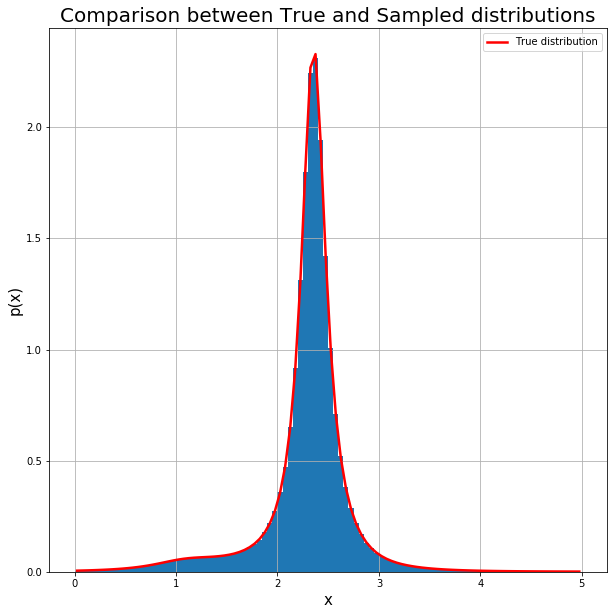

In [6]:
fig = plt.figure(figsize=[10,10])

val, bins, patches = plt.hist(samples, bins=100, range=(0, 5), density=True)

# Get bins centers
bins = (bins[:-1] + bins[1:])/2

plt.plot(bins, p(bins), '-r', label = 'True distribution', linewidth = 2.5)
plt.title('Comparison between True and Sampled distributions', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('p(x)', fontsize=15)
plt.grid()
plt.legend()

plt.show(fig)

## c) Now consider a function f(x) meant to provide an envelope for p(x).

In [7]:
# Define envelope function

def f(t):
    
    x0, y0 = 0, 0.01
    x1, y1 = 1.8, 0.15
    x2, y2 = 2.35, 2.5
    x3, y3 = 3., 0.1
    x4, y4 = 5., 0.002
    
    if ((x0<=t) & (t<=x1)):
        return (y1 - y0)*(t - x0)/(x1 - x0) + y0
    
    elif ((x1<=t) & (t<=x2)):
        return (y2 - y1)*(t - x1)/(x2 - x1) + y1
    
    elif ((x2<=t) & (t<=x3)):
        return (y3 - y2)*(t - x2)/(x3 - x2) + y2
    
    elif ((x3<=t) & (t<=x4)):
        return (y4 - y3)*(t - x3)/(x4 - x3) + y3
    
    else:
        return 0    

In [8]:
# Compute cumulative distribution function for values of f(x)
dx = 0.001
x = np.arange(0, 5+dx, dx)

cdf = np.zeros((len(x)))
for i in range(1, len(cdf)):
    cdf[i] = cdf[i-1] + quad(f, x[i-1], x[i])[0]

In [9]:
# Now redo the rejection method
N = 10**6
tot = 0        # total number of cicles
samples = []   # create list of samples

start = time.time()
while(len(samples)<N):
    x1 = ran.uniform(cdf[0], cdf[-1])      # random value from f distribution
    x2 = float(x[np.argmin(abs(cdf - x1))])
    y = ran.uniform(0, f(x2))  # random value on y axis
    if (y <= p(x2)):
        samples.append(x2)
    tot += 1
stop = time.time()
print('Time: ', stop-start)

print('Rejection rate: ', 1-len(samples)/tot)

Time:  66.60931897163391
Rejection rate:  0.4503114535304297


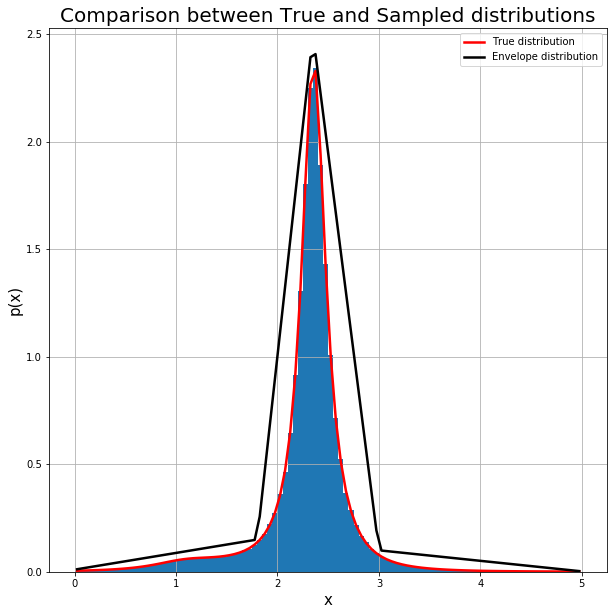

In [10]:
fig1 = plt.figure(figsize=[10,10])

val1, bins1, patches1 = plt.hist(samples, bins=100, range=(0, 5), density=True)

# Get bins centers
bins1 = (bins1[:-1] + bins1[1:])/2

l = []
for j in bins1:
    l.append(f(j))

plt.plot(bins1, p(bins1), '-r', label = 'True distribution', linewidth = 2.5)
plt.plot(bins1, l, '-k', label = 'Envelope distribution', linewidth = 2.5)
plt.title('Comparison between True and Sampled distributions', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('p(x)', fontsize=15)
plt.grid()
plt.legend()

plt.show(fig1)